In [1]:
import rebound
import numpy as np
import matplotlib.pylab as plt
import warnings

# Project - PHYS 512

First set up the simulation and units

units for time will always be in s, a is in units AU

In [2]:
# Create a simulation
sim = rebound.Simulation()

# Set up units
sim.units = ('AU', 's', 'Msun')


Next, add the planets

In [3]:
# Add the Sun
sim.add(m=1.0)

# Add the major planets with their approximate masses, semi-major axes, and eccentricities
# Masses are in solar masses, semi-major axes are in AU, and eccentricities are dimensionless

# Mercury
sim.add(m=1.65e-7, a=0.39, e=0.205,hash="mercury")

# Venus
sim.add(m=2.45e-6, a=0.72, e=0.007,hash="venus")

# Earth
sim.add(m=3.00e-6, a=1.00, e=0.017,hash="earth")

# Mars
sim.add(m=3.22e-7, a=1.52, e=0.093,hash="mars")

# Jupiter
sim.add(m=9.54e-4, a=5.20, e=0.049,hash="jupiter")

# Saturn
sim.add(m=2.86e-4, a=9.58, e=0.056,hash="saturn")

# Uranus
sim.add(m=4.37e-5, a=19.22, e=0.046,hash="uranus")

# Neptune
sim.add(m=5.15e-5, a=30.05, e=0.010,hash="neptune")

# Evolve the system

In [4]:
# Set the number of timesteps
year = 60*60*24*360

t_total = 10*year
dt = 1e3
num_timesteps = int(t_total/dt)
sim.dt=dt

# Create arrays to store positions
positions_x = np.zeros((num_timesteps, sim.N))
positions_y = np.zeros((num_timesteps, sim.N))

# Integrate the simulation for each timestep
for i in range(num_timesteps):
    # Record positions
    positions_x[i, :] = [p.x for p in sim.particles]
    positions_y[i, :] = [p.y for p in sim.particles]

    # Integrate for one timestep
    sim.integrate(sim.t+sim.dt)

# Plot the positions

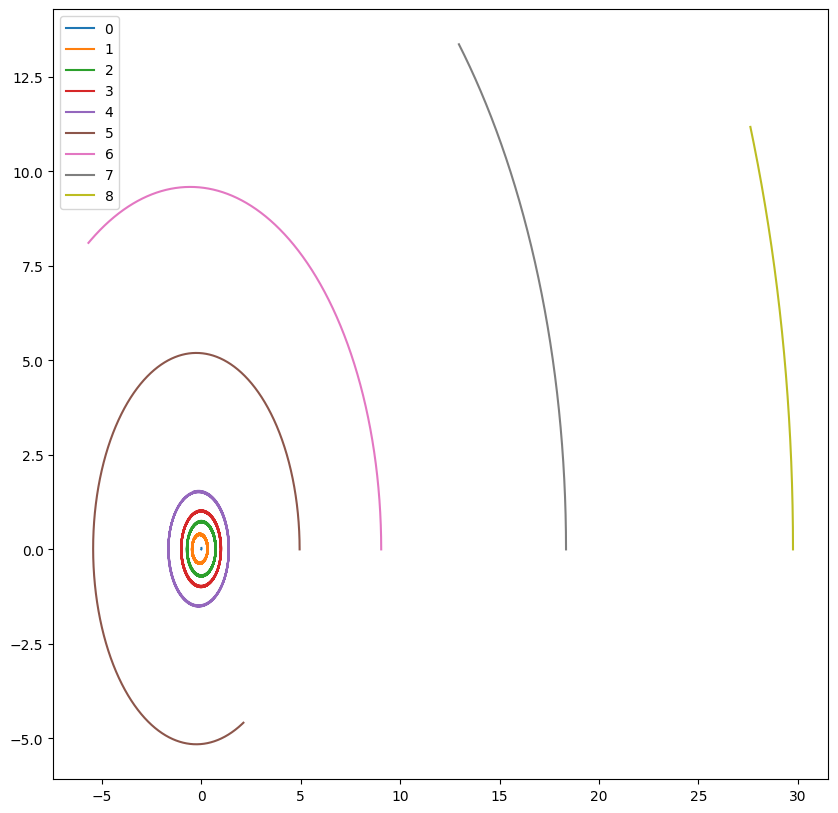

In [5]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.plot(positions_x[:,i],positions_y[:,i],label=i)
plt.legend()

# Creating LightCurves

In [7]:
from lightcurve import LightCurve
radii = np.array([109,0.383,0.949,1,0.532,11.2,9.41,4.01,3.88])
names = ["sun","mercury","venus","earth","mars","jupiter","saturn","uranus","neptune"]
LC = LightCurve(radii_objects=radii, rad_unit="REarth",dist_unit="AU")
objects = LC.compute_lightcurve(positions_x.copy(),positions_y.copy(),names)

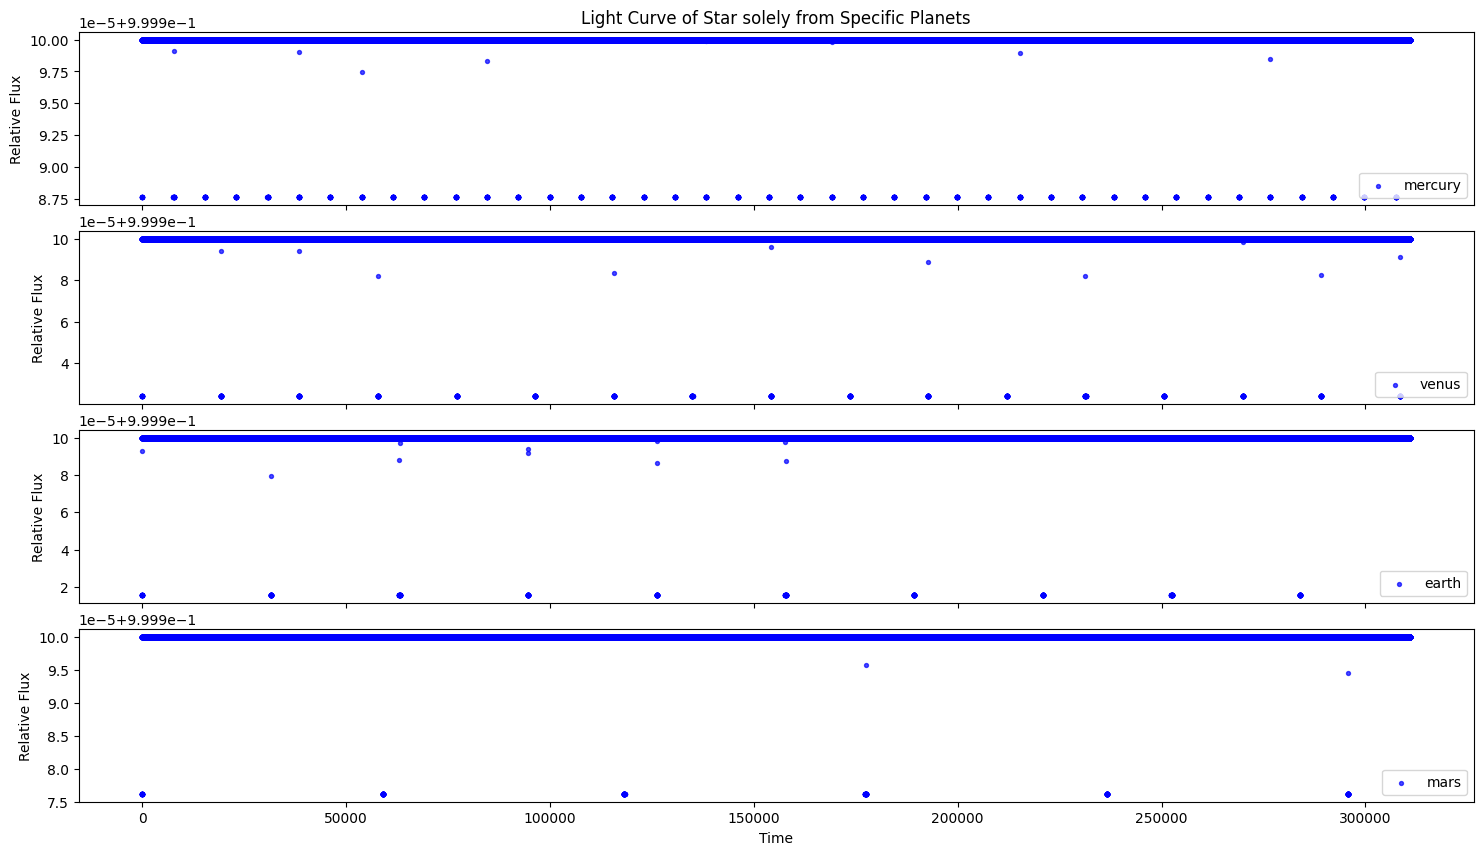

In [8]:
from itertools import islice
inner_planets = dict(islice(objects.items(),5))
fig = LC.plot_multiple_planet(objects=inner_planets,sizex=18,sizey=10,hspace=0.15)
plt.show()

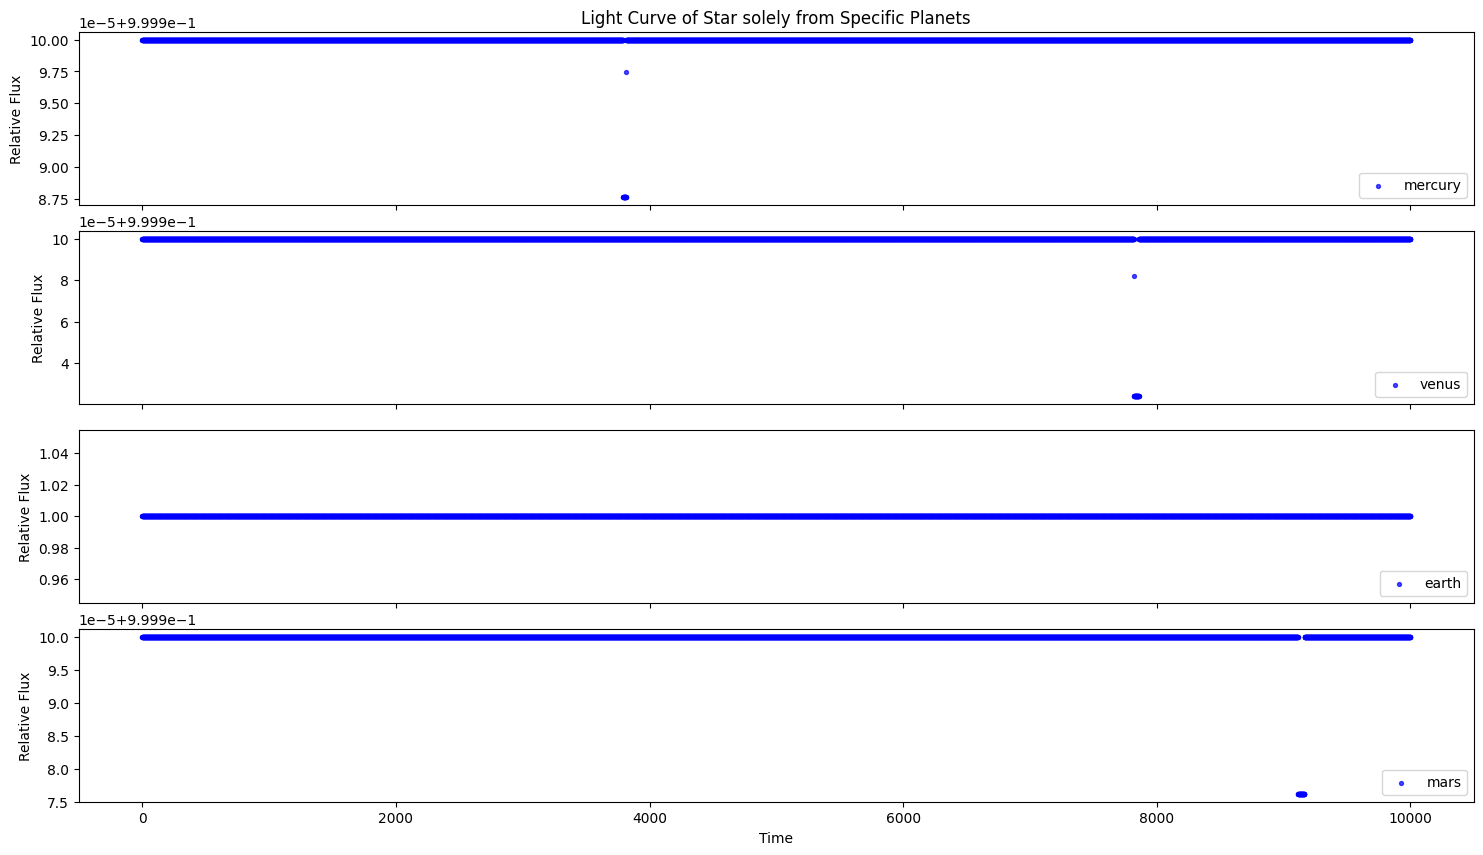

In [9]:
fig = LC.plot_multiple_planet(objects=inner_planets,sizex=18,sizey=10,hspace=0.15,start=50000,end=60000)
plt.show()

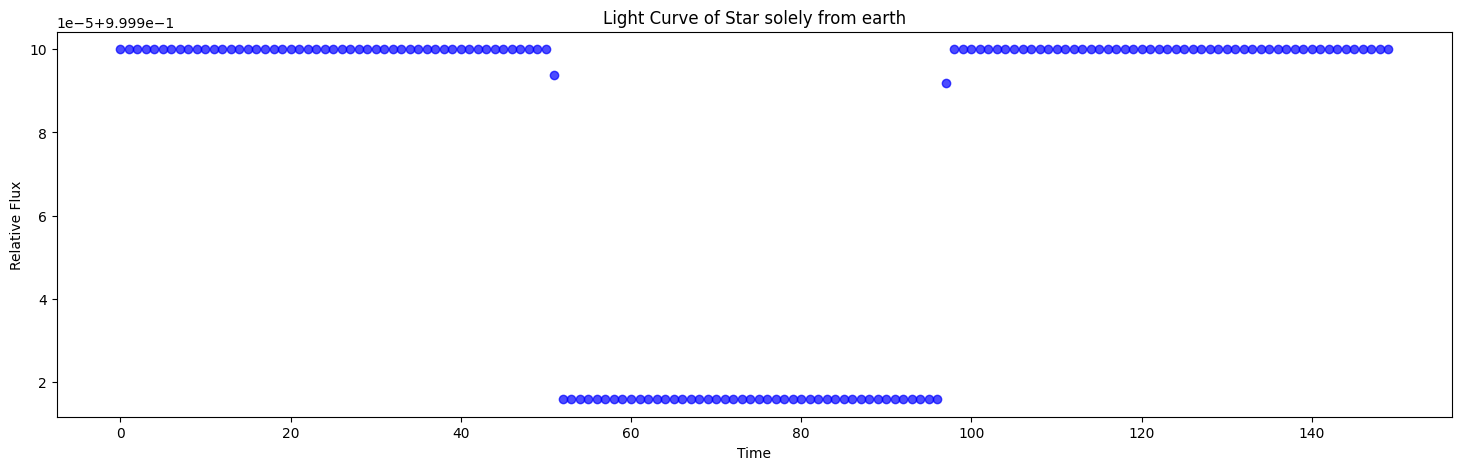

In [10]:
fig = LC.plot_one_planet(objects["earth"],name="earth",sizex=18,sizey=5,start=94600,end=94750)
plt.show()

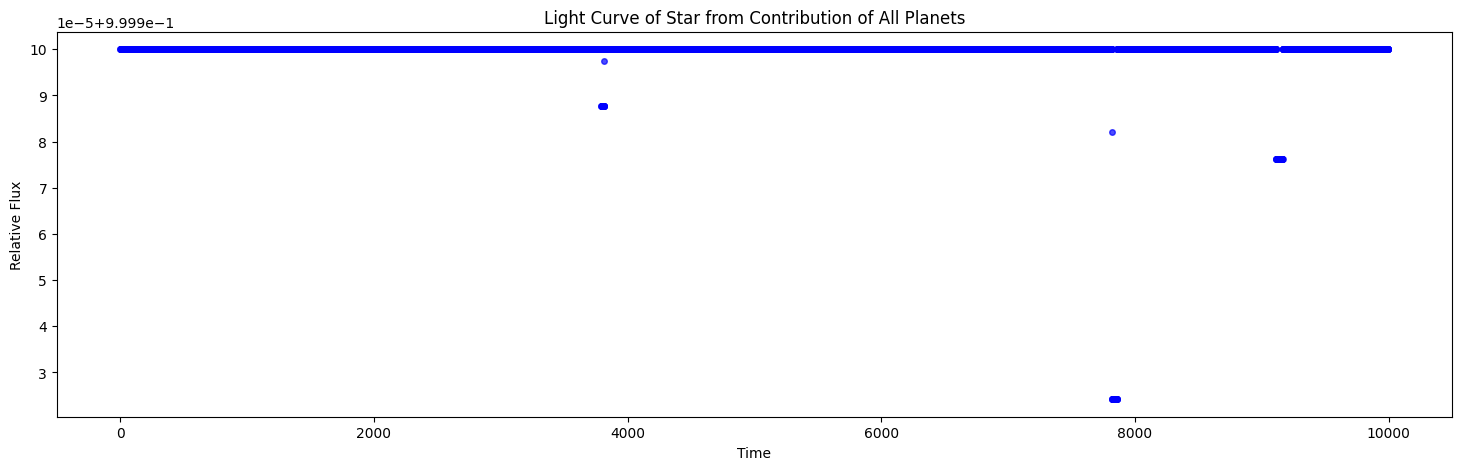

In [11]:
fig = LC.plot_total_lc(objects,sizex=18,sizy=5,start=50000,end=60000)
plt.show()